# ggplot 310 - How to annotate a plot

This notebook shows how we can use geom_text to 
- add text to the plot grid (see 2)
- add a label to each point (see 3 and 4)

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - add text labels to a plot

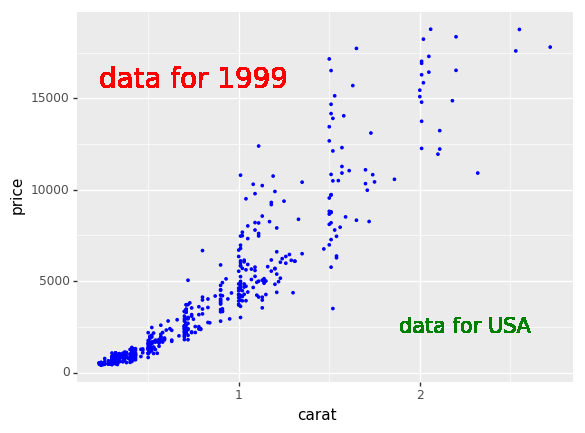

<ggplot: (13138496)>

In [3]:
ggplot(data=dia, mapping=aes(x='carat', y='price')) + \
    geom_point(size=0.5, color='blue') + \
    geom_text(x=0.75, y=16000, label='data for 1999', size=20, color='red') + \
    geom_text(x=2.25, y=2500, label='data for USA', size=15, color='green')

Note that in the geom_txt() the x= and y= give the position of the **center** of the added text

# 3- add a text label to each point

In [5]:
#-- make a simple data set with four labeled points----------------
df = pd.DataFrame([[0,1,'zero'],[1,1,'one'],[2,0,'two'],[3,2,'three']], columns=['X_axis', 'Y_axis','label'])
df

,X_axis,Y_axis,label
0,0,1,zero
1,1,1,one
2,2,0,two
3,3,2,three


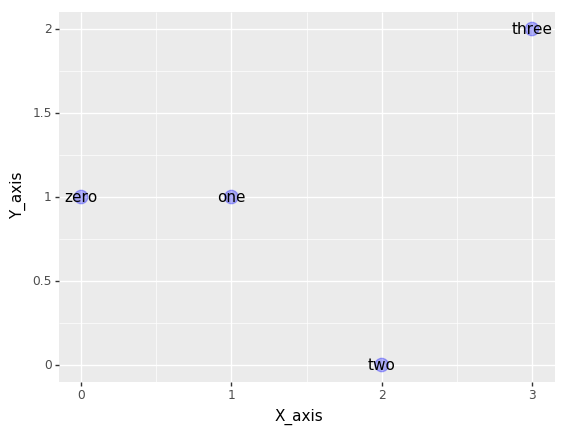

<ggplot: (-9223372036841371041)>

In [6]:
ggplot(data=df, mapping=aes(x='X_axis',y='Y_axis',label='label')) + \
    geom_point(size=5, color='blue', alpha=0.3) + \
    geom_text()

The center of the label and the point have the same position.  
That makes it difficult to read the labels.

It is possible to shift the position of the center of the label by giving the aes of the geom_text it's own x= and y=

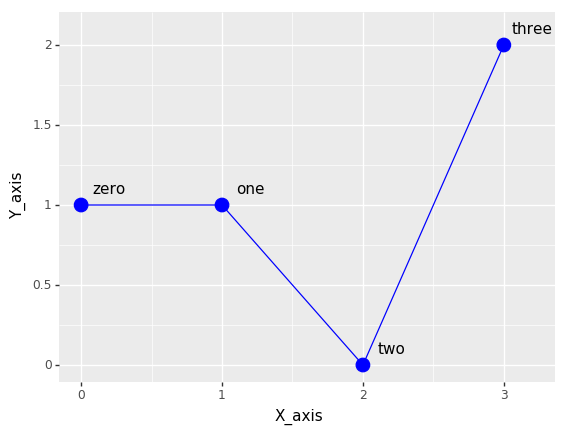

<ggplot: (-9223372036840397694)>

In [7]:
ggplot(data=df, mapping=aes(x='X_axis',y='Y_axis',label='label')) + \
    geom_point(size=5, color='blue') + \
    geom_line(color='blue') + \
    geom_text(aes(x='X_axis+0.2', y='Y_axis+0.1')) # <== note the shifting of the center of the label

We can give the label text an angle.

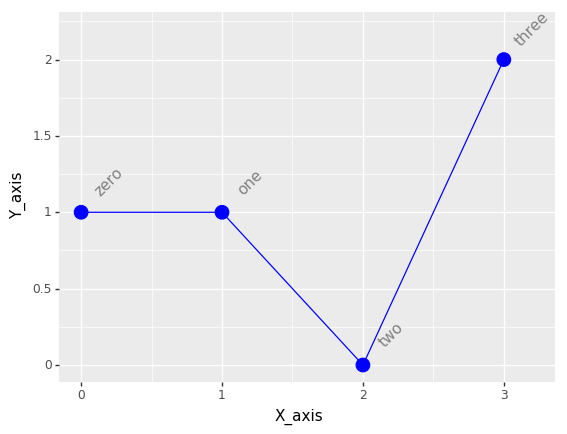

<ggplot: (-9223372036840404732)>

In [8]:
ggplot(data=df, mapping=aes(x='X_axis',y='Y_axis',label='label')) + \
    geom_line(color='blue') + \
    geom_point(size=5, color='blue') + \
    geom_text(aes(x='X_axis+0.2', y='Y_axis+0.2'), angle=45, color='gray')

# 4 - a more realistic example of labeled points

Adding a label to each point becomes problematic when the number of points increases.  
Here is an example with 32 points.

In [9]:
cars = pd.read_csv('./dat/mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


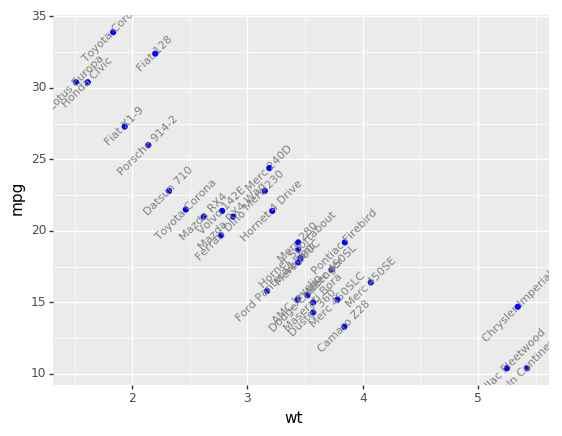

<ggplot: (14223438)>

In [10]:
ggplot(data=cars, mapping=aes(x='wt',y='mpg', label='model')) + \
    geom_point(color='blue') + \
    geom_text(angle=45,size=8, color='gray')    

Even with 32 point the plot quickly becomes difficult to read.   
Probably we should avoid this kind of labeling (except maybe for test purposes). 